In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import model_selection
from sklearn import metrics
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [26]:
df = pd.read_csv(os.getcwd() + '/DATABASE/base-reduzida-v5.csv', sep = ',')
df = df.drop(df.columns[0], axis=1)
df.head()

,Estado de saúde,Pouco Interesse em atividades,Frequência de consumo de bebida,Qtde dias na semana que bebe,Qtde doses quando bebe,Aviso bebida últimos 12M,Falta de memória após beber nos últimos 12M,Mais de 5 doses em uma ocasião nos últimos 30D,Problemas com cansaço,Problemas para dormir,Sentimento depressivo,Sentimento de fracasso,Ideação suicida,Diagnóstico de depressão,Diagnóstico de alcoolismo,Alcoolismo e Depressão
0,1.0,1.0,2.0,0.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,1.0,1.0,2.0,0.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,1.0,1.0,2.0,0.0,4.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


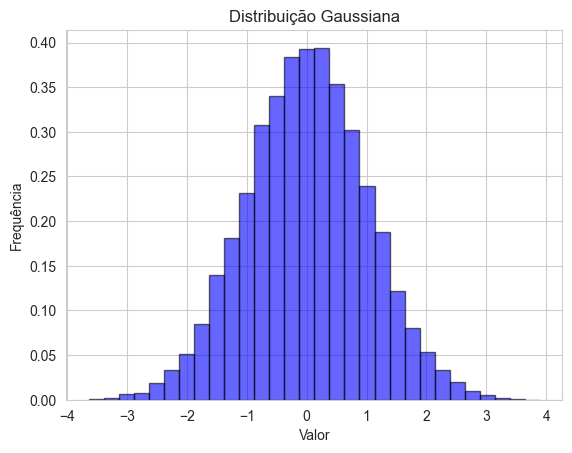

In [27]:
# Parâmetros da distribuição gaussiana
mu = 0  # Média
sigma = 1  # Desvio padrão
tamanho_amostra = len(df)  # Tamanho da amostra

# Gerar dados normalmente distribuídos
dados = np.random.normal(mu, sigma, tamanho_amostra)

# Traçar um histograma para visualizar a distribuição
plt.hist(dados, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.title('Distribuição Gaussiana')
plt.grid(True)
plt.show()

In [28]:
# Todos os outliers da base
def Outlier(df):
   
   sns.boxplot(
      data = df,
      orient =  "h",
      showcaps = False,
      notch = True,
      flierprops = {"marker": "."},
      boxprops = {
         "facecolor": (.4, .6, .8, .5)
      },
      medianprops = {
         "color": "coral"
      }
   )

In [29]:
# Função para normalizar usando Min-Max
def minmax_scaling(df):
    return (df - df.min()) / (df.max() - df.min())

# Aplicando a normalização Min-Max ao DataFrame
df = minmax_scaling(df)

In [30]:
df

,Estado de saúde,Pouco Interesse em atividades,Frequência de consumo de bebida,Qtde dias na semana que bebe,Qtde doses quando bebe,Aviso bebida últimos 12M,Falta de memória após beber nos últimos 12M,Mais de 5 doses em uma ocasião nos últimos 30D,Problemas com cansaço,Problemas para dormir,Sentimento depressivo,Sentimento de fracasso,Ideação suicida,Diagnóstico de depressão,Diagnóstico de alcoolismo,Alcoolismo e Depressão
0,0.00,0.000000,0.5,0.000000,0.071429,0.333333,0.2,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.00,0.000000,0.5,0.000000,0.047619,0.333333,0.2,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.00,0.000000,0.5,0.000000,0.095238,0.333333,0.2,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16774,0.25,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.333333,0.333333,0.333333,0.333333,1.0,0.0,0.0
16775,0.25,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0
16776,0.50,0.333333,1.0,0.000000,0.071429,0.333333,0.2,1.0,0.333333,0.333333,0.333333,0.000000,0.000000,1.0,0.0,0.0
16777,0.50,0.666667,1.0,0.142857,0.166667,0.666667,0.4,0.5,1.000000,1.000000,1.000000,0.000000,0.000000,1.0,1.0,1.0


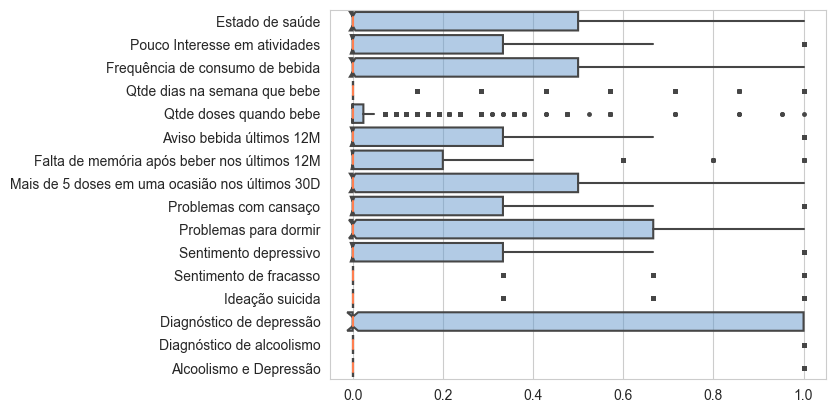

In [31]:
Outlier(df)

In [32]:
test_size = 0.4 # Tamanho do conjunto de teste
seed = 101 # Para que a separação dos dados ocorra sempre a partir da mesma semente (seed), e seja reproduzível em qualquer execução

In [33]:
#Randomizando os dados do Dataframe
df = df.sample(frac=1, random_state=seed).reset_index(drop=True)

In [34]:
X = df.drop(columns=["Alcoolismo e Depressão", "Diagnóstico de depressão", "Diagnóstico de alcoolismo"], axis=1)
Y = df["Diagnóstico de depressão"]


print("X:", len(X), "Y:", len(Y))

X: 16779 Y: 16779


In [35]:
test_size = 0.2 # Tamanho do conjunto de teste

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = test_size, random_state=seed, stratify=Y)

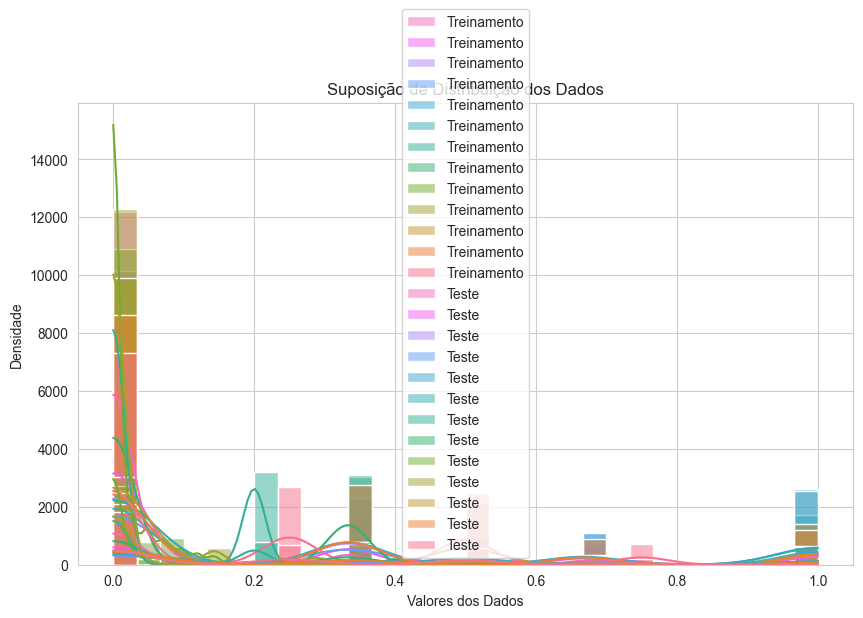

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection


# Configurações do gráfico
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

# Plotando os dados de X_train e X_test
sns.histplot(X_train, color='blue', kde=True, label='Treinamento', bins=30, alpha=0.5)
sns.histplot(X_test, color='red', kde=True, label='Teste', bins=30, alpha=0.5)

# Título e legendas
plt.title('Suposição de Distribuição dos Dados')
plt.xlabel('Valores dos Dados')
plt.ylabel('Densidade')
plt.legend()

plt.show()


In [37]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# # Suponhamos que estes são os seus dados
# dados_treinamento = X_train
# dados_teste = np.random.randn(1000) + 2

# # Configurações do gráfico
# sns.set_style('whitegrid')
# plt.figure(figsize=(10, 6))

# # Plotando os dados
# sns.histplot(dados_treinamento, color='blue', kde=True, label='Treinamento', bins=30, alpha=0.5)
# sns.histplot(dados_teste, color='red', kde=True, label='Teste', bins=30, alpha=0.5)

# # Título e legendas
# plt.title('Suposição de Distribuição dos Dados')
# plt.xlabel('Valores dos Dados')
# plt.ylabel('Densidade')
# plt.legend()

# plt.show()


In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

# Defina o modelo que você deseja avaliar
modelo = RandomForestClassifier()

# Defina o número de folds
num_folds = 10  # Você pode ajustar esse valor conforme necessário

# Defina a métrica que deseja avaliar (por exemplo, precisão)
metrica = make_scorer(precision_score)

# Crie um objeto de validação cruzada k-fold
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Realize a validação cruzada e obtenha as métricas de desempenho
scores = cross_val_score(modelo, X, Y, cv=kf, scoring=metrica)

# Calcule a média das métricas
media_desempenho = scores.mean()
desvio_padrao = scores.std()

print(f'Média da Precisão: {media_desempenho}')
print(f'Desvio Padrão da Precisão: {desvio_padrao}')


Média da Precisão: 0.9964935905928588
Desvio Padrão da Precisão: 0.0013326779498201709


In [39]:
rf_classifier = RandomForestClassifier()
scaler = StandardScaler()

scaler.fit(X_train)  # Ajuste aos dados de treinamento

X_train_scaled = scaler.transform(X_train)  # Padronize os dados de treinamento
X_test_scaled = scaler.transform(X_test) 

In [40]:
X_train_scaled

array([[ 0.20105626,  2.52848493,  2.4619405 , ...,  2.38442305,
         2.99498367,  5.13635475],
       [-0.77640775, -0.63282778, -0.55147557, ..., -0.65345881,
        -0.49545124, -0.28614602],
       [-0.77640775, -0.63282778, -0.55147557, ..., -0.65345881,
        -0.49545124, -0.28614602],
       ...,
       [ 2.15598426, -0.63282778,  2.4619405 , ..., -0.65345881,
        -0.49545124, -0.28614602],
       [-0.77640775, -0.63282778, -0.55147557, ..., -0.65345881,
        -0.49545124, -0.28614602],
       [ 1.17852026,  0.42094313, -0.55147557, ...,  0.35916848,
        -0.49545124,  1.52135423]])

In [41]:
modelo.fit(X_train_scaled, y_train)  # Treine o modelo com os dados padronizados

y_pred = modelo.predict(X_test_scaled)  # Faça previsões

NameError: name 'y_train' is not defined

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report = df_report.round(2) 
df_report

,precision,recall,f1-score,support
0.0,1.00,0.98,0.99,246.00
1.0,0.98,1.00,0.99,239.00
accuracy,0.99,0.99,0.99,0.99
macro avg,0.99,0.99,0.99,485.00
weighted avg,0.99,0.99,0.99,485.00


In [ ]:
# Criar uma instância do modelo SVR com kernel rbf
svr = SVR(kernel='rbf')
# Realizar a validação cruzada (por exemplo, com 5-fold)
cv_scores = cross_val_score(svr, X, Y, cv=10, scoring='neg_mean_absolute_error')
# Calcular a média dos scores e inverter o sinal (porque a função de scoring retorna negativo)
mean_cv_score = -np.mean(cv_scores)
# Treinar o modelo SVR com seus dados de treinamento
svr.fit(X_train_scaled, y_train_smote)
# Fazer previsões com o modelo treinado
y_pred_svr = svr.predict(X_test_scaled)
# Métricas 
mae = mean_absolute_error(Y_test, y_pred_svr)
mse = mean_squared_error(Y_test, y_pred_svr)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred_svr)



# Exibir o MAE nos dados de teste
print("Métricas de Avaliação: \n MAE: %s \n MSE: %s \n RMSE: %s \n R2: %s" %(mae, mse, rmse, r2 ))
# Definindo um limiar para classificar as saídas como 'Tem' ou 'Não tem'
threshold = 0.5
# Discretizando os valores verdadeiros e as previsões
Y_test_discrete = (Y_test >= threshold).astype(int)
y_pred_svr_discrete = (y_pred_svr >= threshold).astype(int)
# Definindo as labels para a matriz de confusão
labels = ['Não tem', 'Tem']
# Calculando a matriz de confusão
conf_matrix = confusion_matrix(Y_test_discrete, y_pred_svr_discrete, labels=[0, 1])
# Calculando a acurácia por classe
accuracy_per_class = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
# Criando uma nova matriz de confusão para exibir as porcentagens
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)
# Plotando a matriz de confusão com porcentagens
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, ax=ax, cmap='Blues', fmt='.2%', xticklabels=labels, yticklabels=labels)
# Configurando título e eixos
ax.set_title('Matriz de Confusão Binária com Percentuais por Classe')
ax.set_xlabel('Previsões')
ax.set_ylabel('Verdadeiros')
plt.show()

# Exibindo a acurácia por classe
for i, label in enumerate(labels):
    print(f"Acurácia da classe '{label}': {accuracy_per_class[i]:.2%}")
# Exibindo a acurácia geral
accuracy_svr = accuracy_score(Y_test_discrete, y_pred_svr_discrete)
print(f"Acurácia geral do modelo: {accuracy_svr:.2%}")